In [53]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
y_test = pd.read_csv('y_test.zip').drop(columns = ['Unnamed: 0'])
pred_randomForest = pd.read_csv('pred_randomForest.zip').drop(columns = ['Unnamed: 0'])

- The precision is the ratio $ TP / (TP + FP) $ where TP is the number of true positives and FP the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
The best value is 1 and the worst value is 0.[1]

- The recall is the ratio $ TP / (TP + FN) $ where TP is the number of true positives and FN the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The best value is 1 and the worst value is 0.[2]

- The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: \
$ F1 = 2 * (precision * recall) / (precision + recall) $ [3]

In this case, apply `average="weighted"` which 'Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).'

In [41]:
def scores(score, test):
    precision = precision_score(score, test, average="weighted")
    recall = recall_score(score, test, average="weighted")
    f1 = f1_score(score, test, average="weighted")
    return precision, recall, f1

In [43]:
precision, recall, f1 = scores(pred_randomForest, y_test)
print('Precision is: ', precision)
print('Recall is: ', recall)
print('F1-score is: ', f1)

Precision is:  0.999713739680422
Recall is:  0.9997064925864075
F1-score is:  0.999708952843785


#### Confussion Matrix

[[19347     0     4     0     2]
 [    0 78355     0     0     0]
 [   12     0   222     1     0]
 [    2     0     0    10     0]
 [    8     0     0     0   842]]


Text(33.0, 0.5, 'True value')

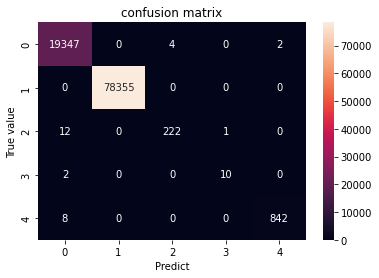

In [59]:
conf_mat = confusion_matrix(y_test, pred_randomForest, labels=[float(i) for i in range(5)])
print(conf_mat)
label=['normal', 'DOS', 'R2L', 'U2R', 'probing']
f,ax=plt.subplots()
sns.heatmap(conf_mat,annot=True,ax=ax,fmt='g')
ax.set_title('confusion matrix')
ax.set_xlabel('Predict')
ax.set_ylabel('True value')


[1] https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html \
[2] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html \
[3] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score \
[4] https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html \
[5] https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea \
[6] https://zhuanlan.zhihu.com/p/126278814

In [46]:
y_test.test.unique().tolist()

[1.0, 0.0, 4.0, 2.0, 3.0]

In [48]:
confusion_matrix(y_test, pred_randomForest, labels=y_test.test.unique().tolist())

array([[78355,     0,     0,     0,     0],
       [    0, 19347,     2,     4,     0],
       [    0,     8,   842,     0,     0],
       [    0,    12,     0,   222,     1],
       [    0,     2,     0,     0,    10]], dtype=int64)

In [49]:
confusion_matrix(y_test, pred_randomForest, labels=[0.0, 1.0, 4.0, 2.0, 3.0])

array([[19347,     0,     2,     4,     0],
       [    0, 78355,     0,     0,     0],
       [    8,     0,   842,     0,     0],
       [   12,     0,     0,   222,     1],
       [    2,     0,     0,     0,    10]], dtype=int64)

In [51]:
[float(i) for i in range(5)]

[0.0, 1.0, 2.0, 3.0, 4.0]

Average precision (AP) summarizes such a plot as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:

$ AP = \sum_n(R_n -R_{n-1} )P_n $

where  and  are the precision and recall at the nth threshold. A pair  is referred to as an operating point. [4] 

In [29]:
y_test

,test
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
98800,1.0
98801,0.0
98802,0.0
98803,1.0


In [36]:
pred_randomForest

,0
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
98800,1.0
98801,0.0
98802,0.0
98803,1.0


In [32]:
new_columns = []
for i in y_test.test.unique():
    new_columns.append('test_is_'+str(i))

In [35]:
y_test_dummy = pd.DataFrame(columns = new_columns)
for i in range(y_test.shape[0]):
    for value in y_test.test.unique():
        if y_test.iloc[i].test == value:
            y_test_dummy.at[i, 'test_is_'+str(value)] = 1
y_test_dummy

KeyboardInterrupt: 

In [ ]:
def dummy_variables(df):
    df.test.unique()

In [28]:
import matplotlib.pyplot as plt

precision = dict()
recall = dict()
n_classes = y_test.test.unique().size
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        pred_randomForest[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
# colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

# f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()

In [30]:
y_test.test.unique()

array([1., 0., 4., 2., 3.])

In [ ]:
def binary_transform:
    for i in range(y_test.shape[0]):
        

In [6]:
precision, recall = precision_recall_curve(y_test, pred_randomForest)
curve = PrecisionRecallDisplay(precision=precision, recall=recall)
curve.plot()

ValueError: multiclass-multioutput format is not supported

In [7]:
pred_randomForest

,Unnamed: 0,0
0,0,1.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,1.0
...,...,...
98800,98800,1.0
98801,98801,0.0
98802,98802,0.0
98803,98803,1.0
